In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [3]:
#Delete rows with missing data
penguins.dropna(inplace=True)

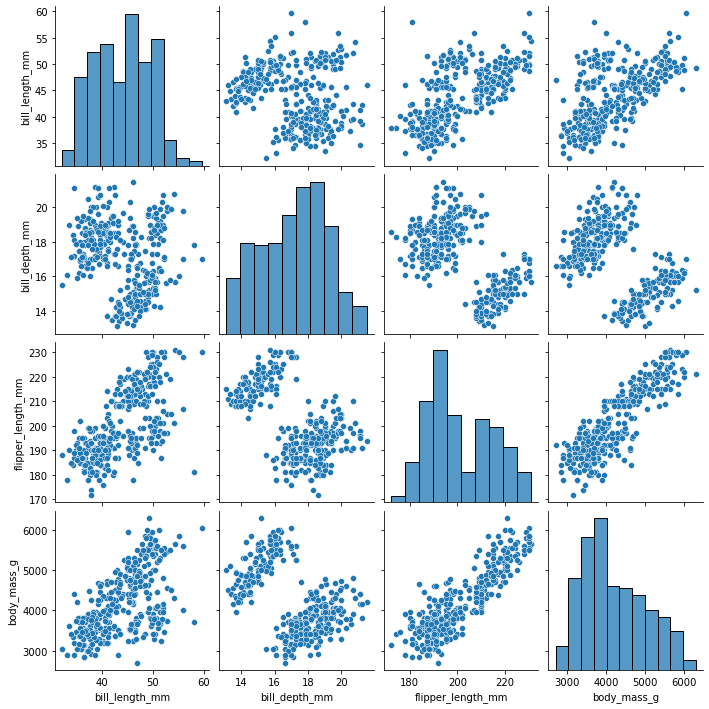

In [4]:
sns.pairplot(penguins)

In [5]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=2, random_state=42).fit(penguins[features])
#Two clusters is the minimum, this gave a higher score than the 3 clusters that were picked before that.
#Including all numerical properties gives the model more data, removing a property leads to a lower Silhouette Coefficient.

In [6]:
penguins['cluster'] = km.predict(penguins[features])

In [7]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  cluster  
0       3750.0    Male        0  
1       3800.0  Female        0  
2       3250.0  Female        0  
4       3450.0  Female        0  
5       3650.0    Male        0

In [8]:
penguins.cluster.value_counts()

0    203
1    130
Name: cluster, dtype: int64

In [9]:
metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')

0.6307117469850305

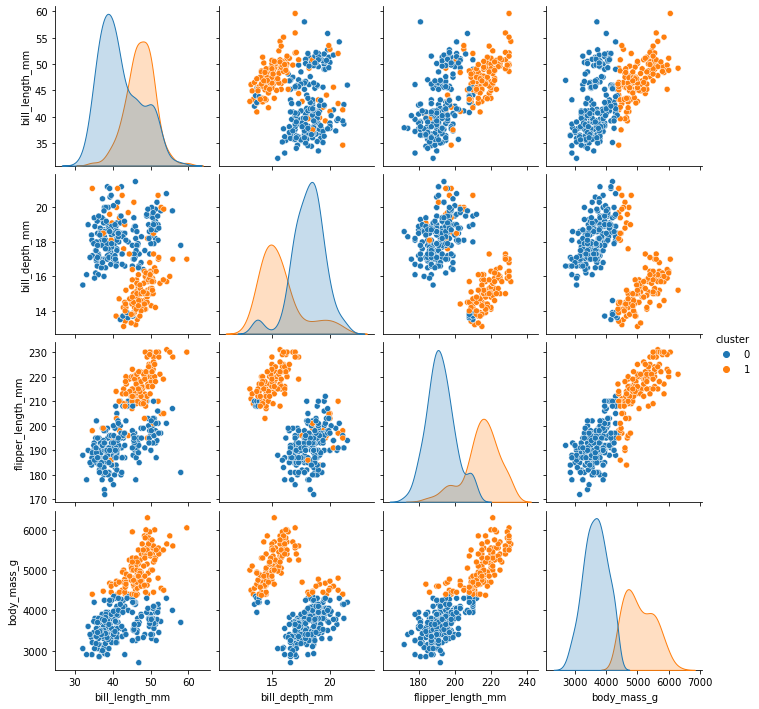

In [10]:
sns.pairplot(penguins, hue="cluster")

In [11]:
contingency_table = penguins.groupby(['species', 'cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster      0    1
species            
Adelie     132   14
Chinstrap   63    5
Gentoo       8  111

Having only two clusters obviously means that the three species can't all have their own cluster. However, there is quite a clear distinction between the Gentoo species, and the Adelie and Chinstrap species. Only very few of the Adelie and Chinstrap penguins are in cluster 1, while less than 10 (out of 120) Gentoo penguins are in cluster 0.
From this it might be concluded that the Adelie and Chinstrap penguins are very similar to eachother in relation to the Gentoos, when comparing the three species, and the two species combined are different from Gentoo on its own.